In [1]:
import imageio.v3 as iio
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from cellSAM import cellsam_pipeline
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import sys
sys.path.append(r"C:\Users\Leina School\Desktop\Work Exp BDI\BDI-Nuclei_Segmentation\pipeline")

image = np.array(Image.open(r"C:\Users\Leina School\Desktop\Work Exp BDI\data\GTEX-113JC-2226.jpg")) 


c:\Users\Leina School\Desktop\Work Exp BDI\BDIvenv\Lib\site-packages\cellSAM\model.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
from img_manipulation import format_img, tile_img, seperate_tile_types
from find_means import find_means
from run_cellSAM import cellSAM


245.988544
245.998976
245.924544
245.85672
245.934128
245.935584
245.979632
245.987712
245.987456
245.934784
246.0
245.95072
245.997952
245.967232
245.995392
245.866544
245.87712
245.995904
245.997952
245.992832
246.0
245.996928
245.972352
245.83368
245.85208
245.998208
245.998976
245.881344
245.997952
245.936944
245.92656
245.986432
245.897056
245.967248
245.897728
245.986944
245.906112
245.993344
245.98464
245.811344
245.805008
245.996928
245.992512
245.92456
245.921344
245.864032
245.849344
245.885024
245.76472
245.758384
245.913184
245.963136
245.925248
245.949312
245.906304
245.85944
245.848944
245.905584
245.956464
245.943872
245.862176
245.962176
245.89576
244.859616
245.707136
245.781936
245.692288
245.876608
245.91088
245.86144
245.877296
244.9948
245.868656
245.852272
245.962752
245.925088
245.856144
245.928192
245.795216
245.7892
245.853776
245.926976
245.947264
245.882992
245.926272
245.511632
245.860576
245.653536
245.681872
244.196512
244.088784
245.864448
245.86944
245.7

1it [00:11, 11.59s/it]


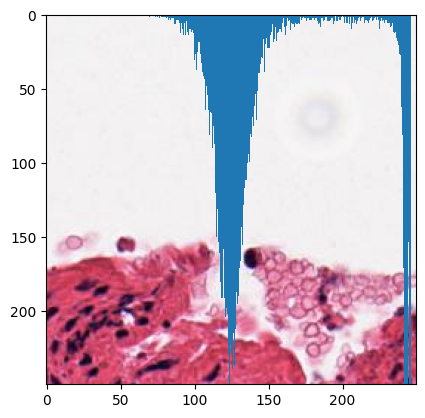

In [7]:
w_target, h_target = 55750, 40500
tile_size = 250

cropped_image = format_img(image, w_target, h_target)

tiles = tile_img(cropped_image, tile_size)

means = find_means(tiles)

tile_groups = seperate_tile_types(means)

tissue_tiles = tile_groups[0]
background_tiles = tile_groups[1]

mask = cellSAM(tiles[tissue_tiles[1]])

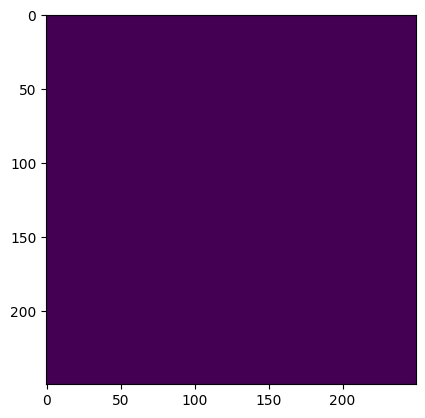

In [4]:
plt.imshow(mask)

In [ ]:
plt.imshow(tissue_tiles[1])

In [ ]:
#self tiler
#crop image so exact tiles made
targ_width, targ_height = 55750, 40500

image = image[:targ_height, :targ_width]
#cropped_pil_image = Image.fromarray(cropped_image)
#cropped_pil_image.save('cropped_image.jpg')

In [ ]:

tile_size = 250

h_tile_num = image.shape[0]//tile_size
w_tile_num = image.shape[1]//tile_size

tiles = []

for y in range(h_tile_num):
    for x in range(w_tile_num):
        #start:stop(not inclusive)
        tile = image[y*tile_size:(y+1)*tile_size, x*tile_size:(x+1)*tile_size, :]
        tiles.append(tile)
            
#print(tiles)

In [ ]:
#histogram
means = []

#find averages of each tile pixel values in greyscale
for tile in tiles:
    img_section = Image.fromarray(tile)
    grey_img = img_section.convert("L")
    grey_tile = np.array(grey_img)
    means.append(grey_tile.mean()) 

print(means)
plt.hist(means, bins = 250)

In [ ]:
#seperate tile types
background_tile = []
tissue_tile = []

#for every tile, check avg, if surpasses threshhold then store index in array
for tile in range(len(means)):
   print(means[tile])
   if means[tile] < 225:
      tissue_tile.append(tile)
   else:
      background_tile.append(tile)

In [ ]:
image = tiles[tissue_tile[967]]

 #Run inference pipeline
mask = cellsam_pipeline(
    image, use_wsi=True, low_contrast_enhancement=False, gauge_cell_size=False
)

# Visualize results
plt.imshow(mask)

In [ ]:
plt.imshow(image)

In [ ]:
#iterate through tissue_tiles and create a tiles equivalent array of masks

masks = []

for tile in tqdm(tissue_tile):
    mask = cellsam_pipeline(tiles[tile], use_wsi=True, low_contrast_enhancement=False, gauge_cell_size=False)
    mask = mask.tolist()
    masks.append(mask)

In [ ]:
# Use several iterations to make the mask edge visible when plotting
dilated_mask = sp.ndimage.binary_dilation(pred_mask > 0, iterations=5)
edges = (dilated_mask > pred_mask).astype(np.uint8)

# Plot the image
plt.imshow(red_test_tile, cmap="gray")

# And the outlines from the mask
plt.imshow(255 * edges, cmap="Reds", alpha=edges)

In [ ]:
print(edges)